In [1]:
import pandas as pd
import seaborn as sns

## Voters

In [2]:
voters_raw = pd.read_excel('data/Active_Voters_by_Race_Gender_as_of_November_1_2020.xlsx')

In [3]:
columns = voters_raw.iloc[7].apply(lambda el: '_'.join(el.strip().split()))
voters = voters_raw.iloc[8:167]

In [4]:
voters.columns = columns
voters.columns.name = None

In [5]:
voters = voters.set_index(voters['COUNTY_NAME'])
voters = voters.drop(columns=['COUNTY_ID', 'COUNTY_NAME'])
voters.index.name = None

In [6]:
voters = voters.apply(pd.to_numeric)

In [7]:
voters

,AI_MALE_VOTERS,AI_FEMALE_VOTERS,AI_UNKNOWN_VOTERS,AP_MALE_VOTERS,AP_FEMALE_VOTERS,AP_UNKNOWN_VOTERS,BH_MALE_VOTERS,BH_FEMALE_VOTERS,BH_UNKNOWN_VOTERS,HP_MALE_VOTERS,...,WH_MALE_VOTERS,WH_FEMALE_VOTERS,WH_UNKNOWN_VOTERS,OT_MALE_VOTERS,OT_FEMALE_VOTERS,OT_UNKNOWN_VOTERS,UK_MALE_VOTERS,UK_FEMALE_VOTERS,UK_UNKNOWN_VOTERS,TOTAL_VOTERS
APPLING,10,5,0,26,28,0,886,1115,0,108,...,3913,4411,4,28,49,0,389,343,3,11440
ATKINSON,2,7,0,2,3,0,395,509,1,161,...,1514,1717,1,16,17,0,119,131,3,4801
BACON,2,3,0,8,10,0,322,525,1,55,...,2482,2838,4,18,20,0,216,172,1,6726
BAKER,1,1,0,5,7,0,408,514,0,8,...,572,610,0,5,6,0,58,51,0,2258
BALDWIN,16,15,1,106,137,0,4553,6322,5,104,...,6447,7300,14,85,114,0,753,642,3,26742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WHITFIELD,49,38,0,228,284,1,1021,1139,1,4199,...,17593,20078,50,308,357,2,2567,2386,19,54779
WILCOX,4,1,0,5,10,0,533,705,0,22,...,1483,1631,1,15,11,0,64,52,0,4562
WILKES,6,6,0,17,14,0,1108,1470,6,23,...,1819,1936,1,20,33,0,202,152,4,6836
WILKINSON,4,6,0,2,10,0,1113,1405,4,7,...,1748,1847,3,16,21,0,143,140,0,6484


## Votes

In [8]:
votes_file = pd.ExcelFile('data/detail.xlsx')
votes_raw = pd.read_excel(votes_file, '1')

In [9]:
columns = ['COUNTY_NAME', 'TRUMP_VOTES', 'BIDEN_VOTES', 'JORGENSEN_VOTES', 'TOTAL_VOTES']
votes = votes_raw.iloc[2:161, [0, 5, 10, 15, 16]]

In [10]:
votes.columns = columns
votes.columns.name = None

In [11]:
votes = votes.set_index(votes['COUNTY_NAME'].apply(lambda el: el.upper()))
votes = votes.drop(columns=['COUNTY_NAME'])
votes.index.name = None

In [12]:
votes = votes.apply(pd.to_numeric)

In [13]:
votes

,TRUMP_VOTES,BIDEN_VOTES,JORGENSEN_VOTES,TOTAL_VOTES
APPLING,6526,1779,36,8341
ATKINSON,2300,825,30,3155
BACON,4018,625,25,4668
BAKER,897,652,6,1555
BALDWIN,8903,9140,208,18251
...,...,...,...,...
WHITFIELD,25636,10670,440,36746
WILCOX,2403,862,16,3281
WILKES,2823,2159,47,5029
WILKINSON,2664,2075,31,4770


## White / Non-White vs Trump / Not-Trump

In [14]:
join = pd.merge(votes, voters, left_index=True, right_index=True)
join['TRUMP_RATIO'] = join['TRUMP_VOTES'] / join['TOTAL_VOTES']
join['WHITE_RATIO'] = (join['WH_MALE_VOTERS'] + join['WH_FEMALE_VOTERS'] + join['WH_UNKNOWN_VOTERS']) / join['TOTAL_VOTERS']

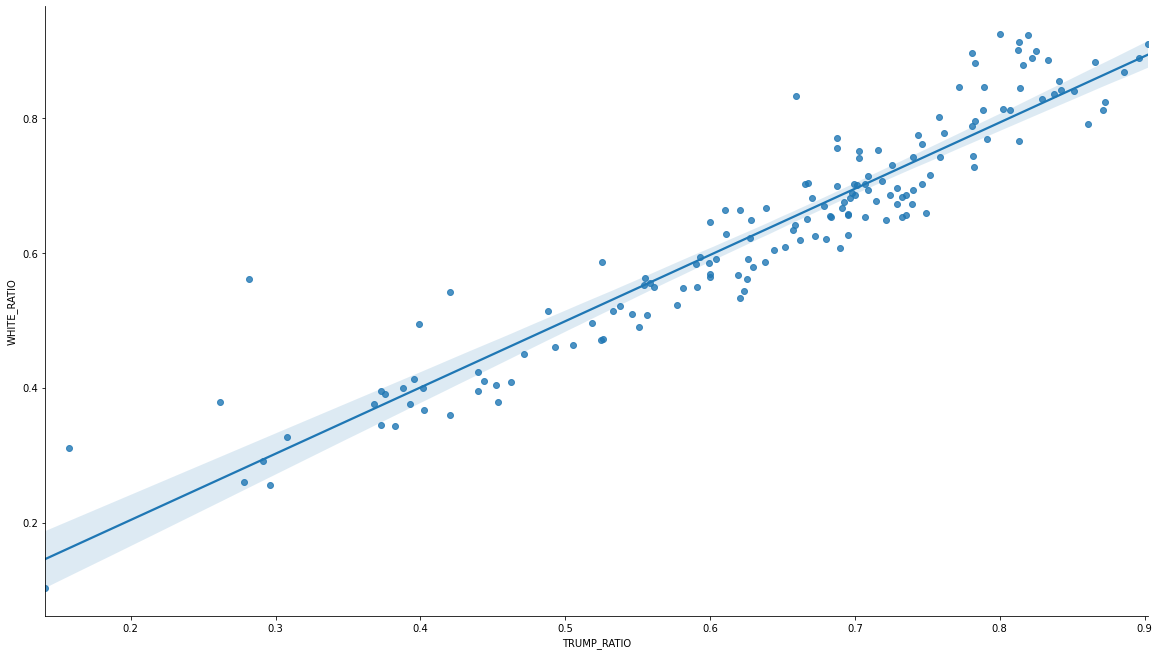

In [15]:
sns.lmplot(x='TRUMP_RATIO', y='WHITE_RATIO', data=join, fit_reg=True, aspect=16/9, height=9)